# Explore Exercise for Time-series Data

- Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

- For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
import acquire
import prepare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-colorblind')
plt.rc('font', size=16)

In [2]:
store = acquire.acquire_all()

In [3]:
store = prepare.prepare_store(store)

In [4]:
store.index.min()

Timestamp('2013-01-01 00:00:00')

In [5]:
store.index.max()

Timestamp('2017-12-31 00:00:00')

In [6]:
store.index.max()-store.index.min()

Timedelta('1825 days 00:00:00')

In [7]:
store['year'] = store.index.year

In [8]:
store.year.value_counts()

2016    183000
2013    182500
2014    182500
2015    182500
2017    182500
Name: year, dtype: int64

In [9]:
store.day_of_week.value_counts()

1    130500
2    130500
3    130500
4    130500
5    130500
6    130500
0    130000
Name: day_of_week, dtype: int64

In [10]:
train = store.loc[:'2016']
test = store.loc['2017']

In [11]:
train.columns

Index(['item', 'quantity', 'sale_id', 'store', 'item_brand', 'item_id',
       'item_name', 'item_price', 'item_upc12', 'item_upc14', 'store_address',
       'store_city', 'store_id', 'store_state', 'store_zipcode', 'month',
       'day_of_week', 'sales_total', 'year'],
      dtype='object')

In [12]:
train['day_of_week'] = train.index.strftime('%a')
train['day_of_week'] =pd.Categorical(train.day_of_week,categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'], ordered=True)

In [13]:
train['price_bin']=pd.qcut(train.item_price, 4, labels=['cheap','low','mid','high'])

In [14]:
train.head()

,item,quantity,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total,year,price_bin
sale_date,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tue,10.92,2013,cheap
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tue,30.16,2013,cheap
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,Tue,308.48,2013,high
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tue,197.55,2013,low
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tue,25.16,2013,cheap


In [15]:
train.day_of_week.value_counts()

Tue    104500
Wed    104500
Thu    104500
Fri    104500
Sat    104500
Sun    104000
Mon    104000
Name: day_of_week, dtype: int64

In [16]:
test.day_of_week.value_counts()

6    26500
0    26000
1    26000
2    26000
3    26000
4    26000
5    26000
Name: day_of_week, dtype: int64

## EDA
- Univariate

Text(0.5, 0.98, 'Sales total by store')

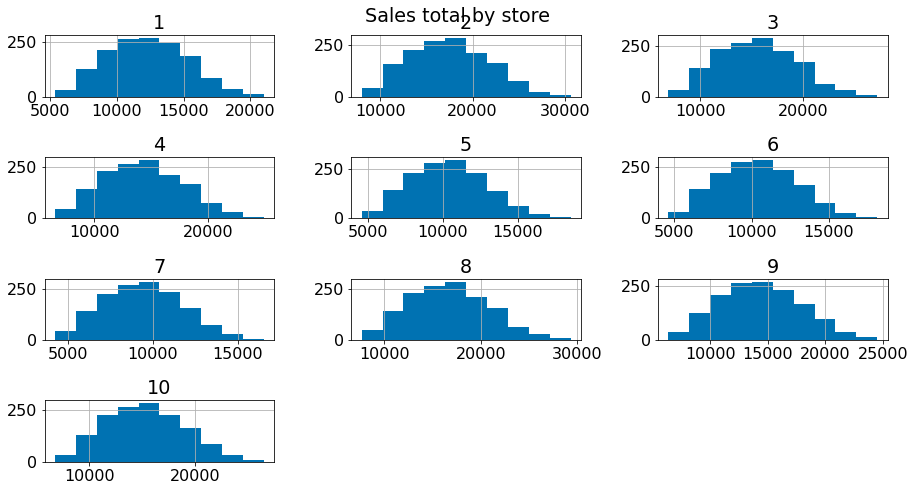

In [17]:
train.groupby(['store', train.index.date]).sales_total.sum().unstack(level=0).hist()
plt.tight_layout()
plt.suptitle("Sales total by store")

#### Comparison by day, week, month, & year

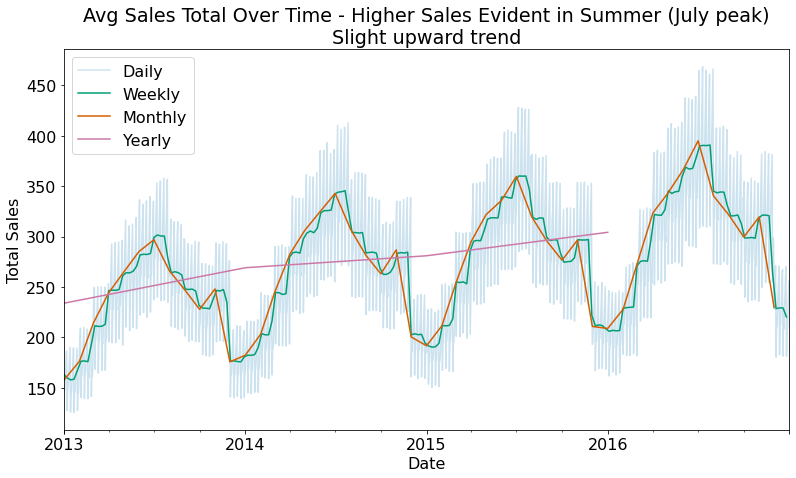

In [18]:
train.resample('D').sales_total.mean().plot(alpha=0.2,label='Daily')
train.resample('W').sales_total.mean().plot(label='Weekly')
train.resample('M').sales_total.mean().plot(label='Monthly')
train.resample('Y').sales_total.mean().plot(label='Yearly')
plt.title('Avg Sales Total Over Time - Higher Sales Evident in Summer (July peak)\nSlight upward trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()

#### Low, mean, high Sales over time

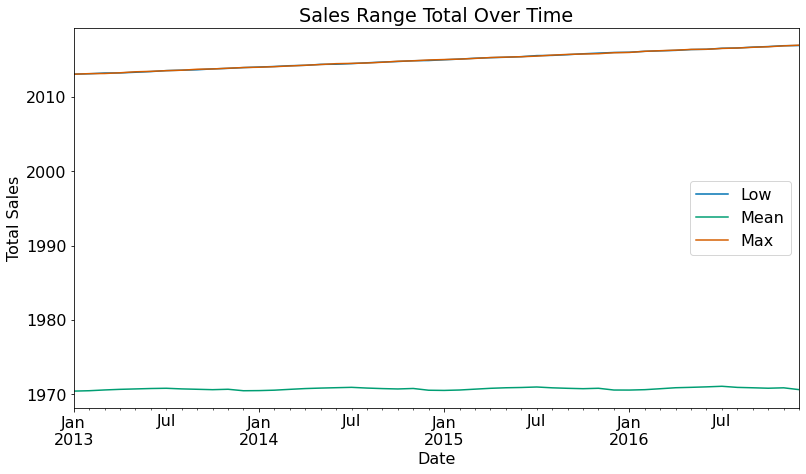

In [19]:
train.resample('M').sales_total.idxmin().plot(label='Low')
train.resample('M').sales_total.mean().plot(label='Mean')
train.resample('M').sales_total.idxmax().plot(label='Max')
plt.title('Sales Range Total Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()

Text(0, 0.5, 'Total Sales')

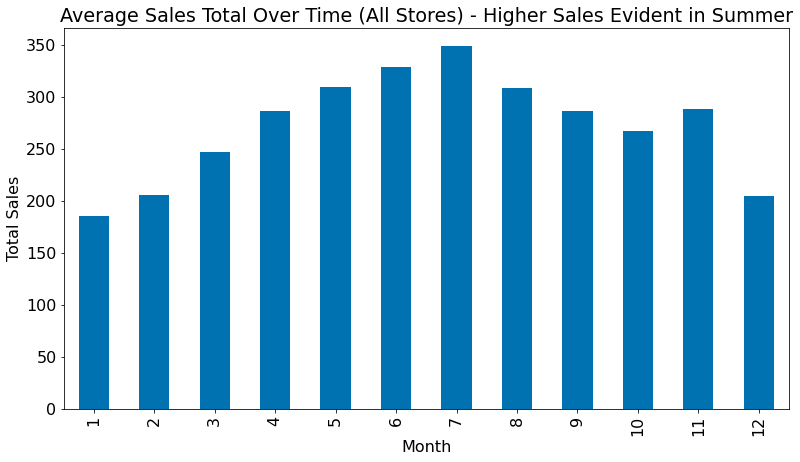

In [20]:
train.groupby(train.index.month).sales_total.agg('mean').plot.bar()
plt.title('Average Sales Total Over Time (All Stores) - Higher Sales Evident in Summer')
plt.xlabel('Month')
plt.ylabel('Total Sales')

Text(0, 0.5, 'Average Sales Total')

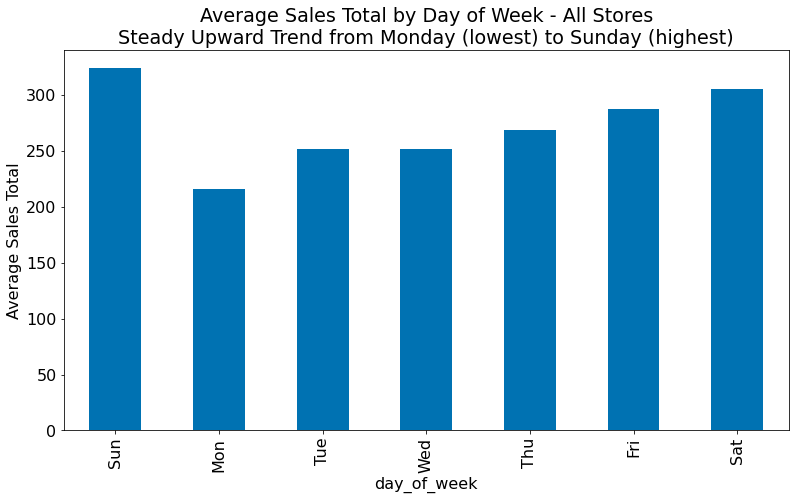

In [21]:
train.groupby(train.day_of_week).sales_total.agg('mean').plot.bar()
plt.title('Average Sales Total by Day of Week - All Stores\nSteady Upward Trend from Monday (lowest) to Sunday (highest)')
plt.ylabel('Average Sales Total')

<AxesSubplot:xlabel='day_of_week', ylabel='sales_total'>

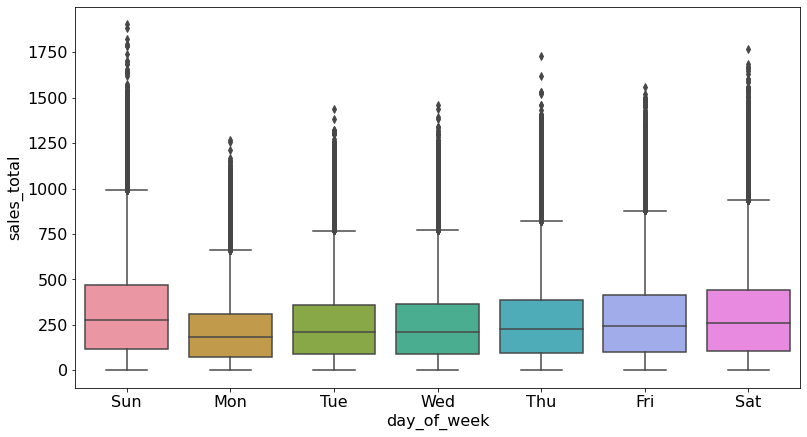

In [22]:
sns.boxplot(data = train, x='day_of_week', y = 'sales_total')

<AxesSubplot:title={'center':'Average Week To Week Change in Total Sales'}, xlabel='sale_date'>

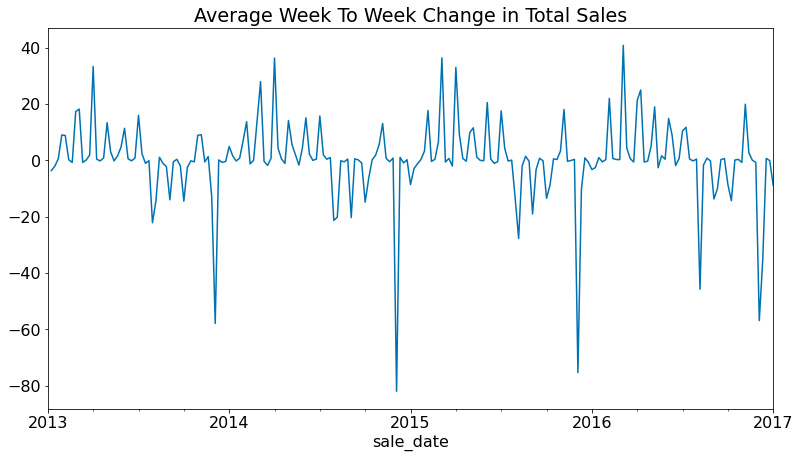

In [23]:
train.resample('W').sales_total.mean().diff().plot(title='Average Week To Week Change in Total Sales')

<AxesSubplot:title={'center':'Average Month to Month Change in Total Sales'}, xlabel='sale_date'>

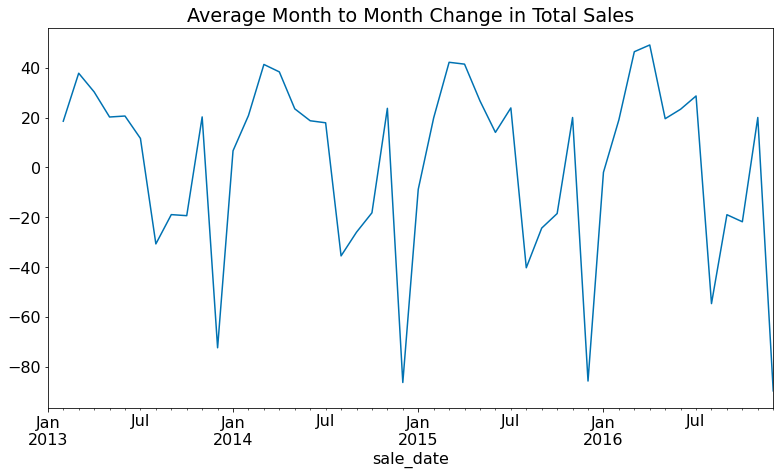

In [24]:
train.resample('M').sales_total.mean().diff().plot(title='Average Month to Month Change in Total Sales')

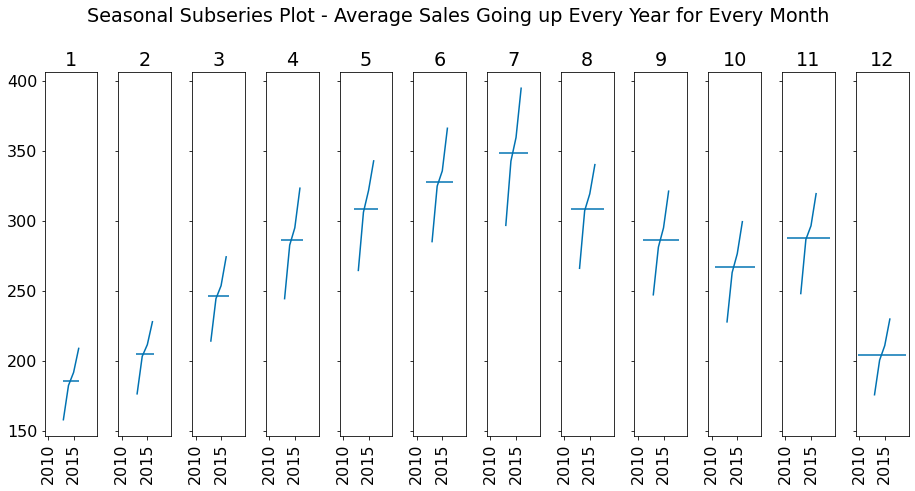

In [25]:
table = train.groupby([train.index.year, train.index.month]).sales_total.mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    ax.tick_params('x',rotation=90)

fig.suptitle('Seasonal Subseries Plot - Average Sales Going up Every Year for Every Month') # super-title for the overall figure
fig.subplots_adjust(wspace=0)
fig.tight_layout()

Text(0.5, 1.0, 'Definite correlation from year to year - strongest from previous year')

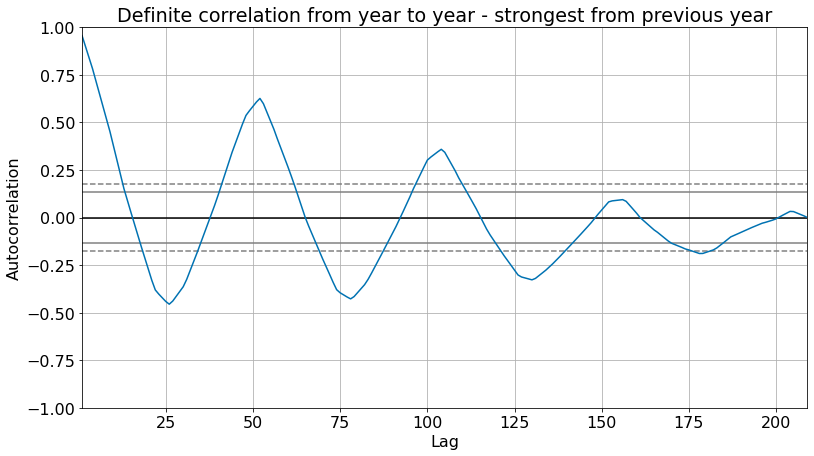

In [27]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())
plt.title('Definite correlation from year to year - strongest from previous year')

## Power Data

In [28]:
power = acquire.acquire_power_data()

In [29]:
power = prepare.prepare_power(power)

In [30]:
power.head()

,date,consumption,wind,solar,wind_solar,month,year
Date,,,,,,,
2006-01-01,2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [31]:
train = power.loc[:'2015']
test = power.loc['2016':]

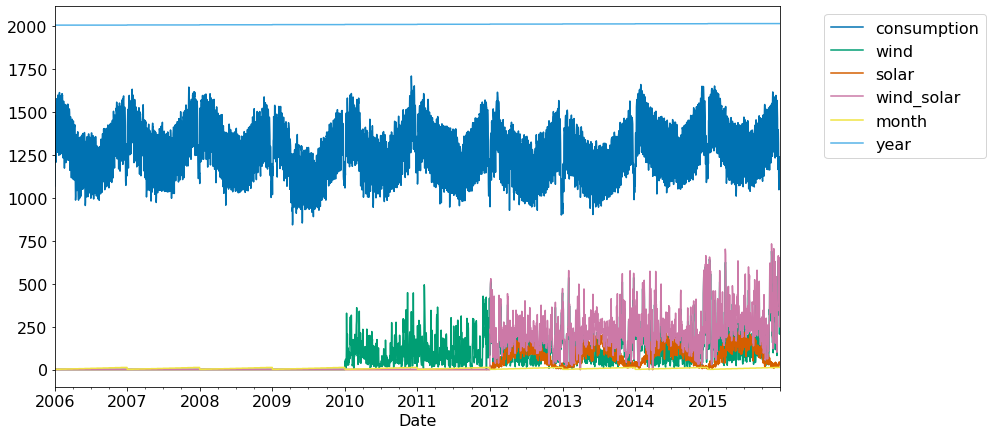

In [32]:
train.plot()
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))

In [33]:
y = train.consumption

<AxesSubplot:ylabel='Frequency'>

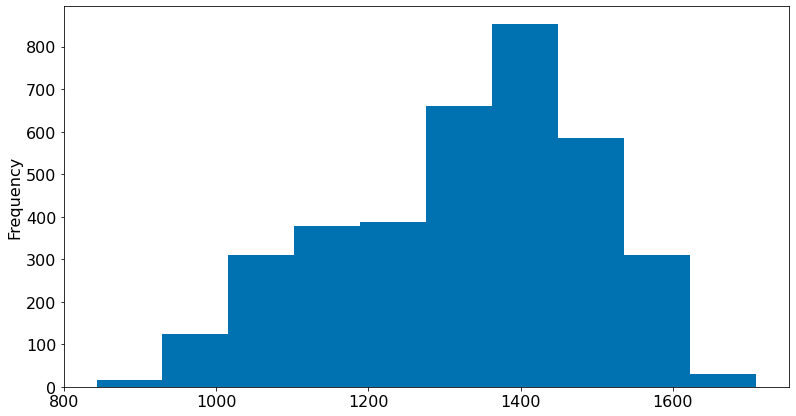

In [34]:
y.plot.hist()

[Text(0.5, 1.0, 'Average Consumption by Month - Higher Values in Winter'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Consumption')]

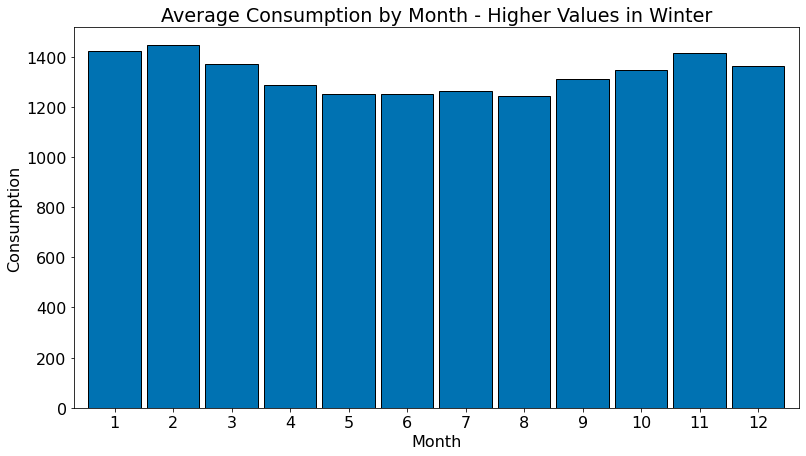

In [35]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Month - Higher Values in Winter', xlabel='Month', ylabel='Consumption')

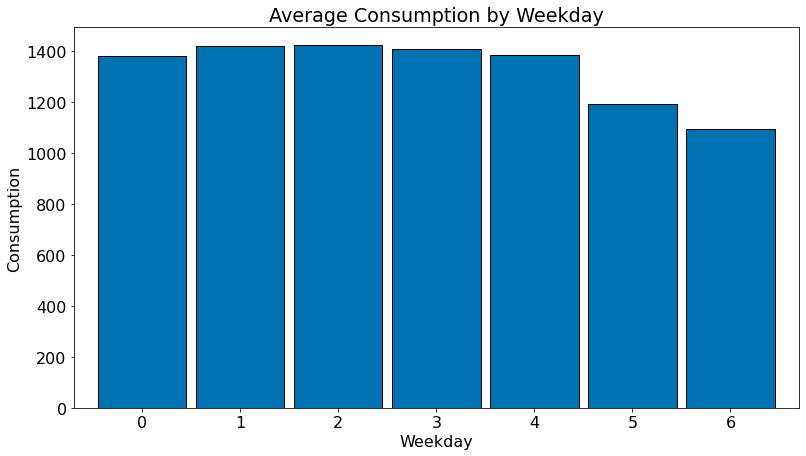

In [36]:
y.groupby(y.index.day_of_week).mean().plot.bar(width=.9, ec='black',title='Average Consumption by Weekday', xlabel='Weekday', ylabel='Consumption')
plt.xticks(rotation=0)
plt.show()

In [37]:
train["day_name"] = train.index.day_name()

<AxesSubplot:xlabel='day_name', ylabel='consumption'>

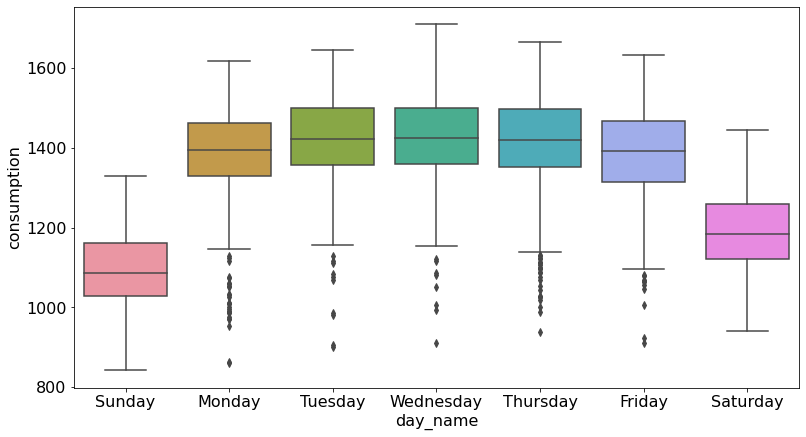

In [38]:
sns.boxplot(data = train, x = 'day_name', y = 'consumption')

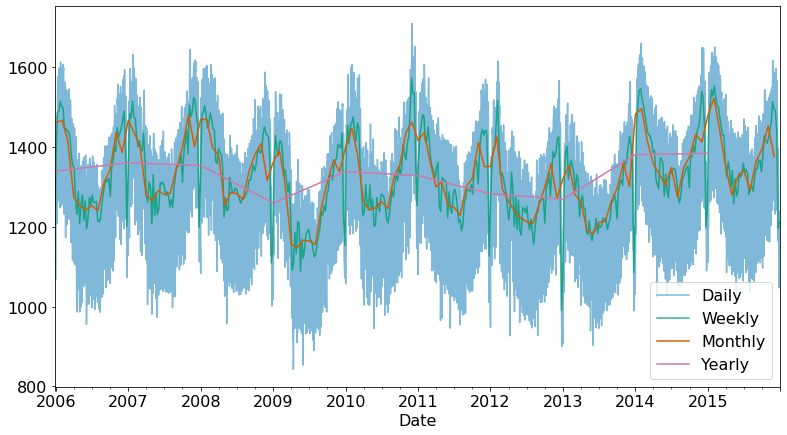

In [39]:
y.plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

<AxesSubplot:title={'center':'Average week-to-week change in consumption'}, xlabel='Date'>

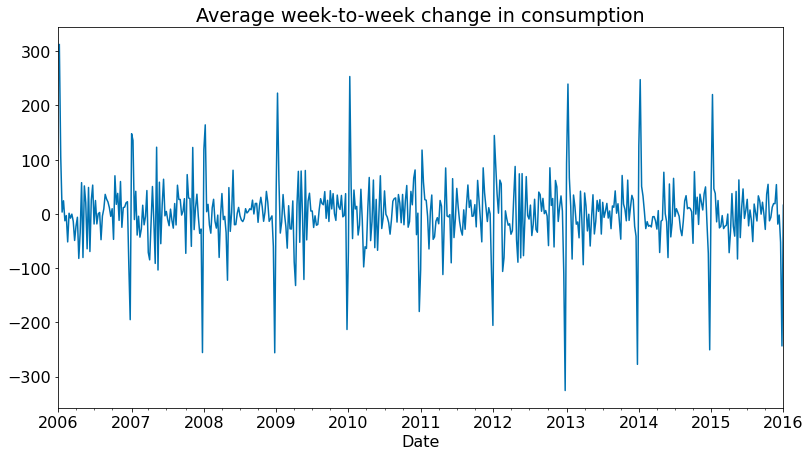

In [40]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in consumption')

<AxesSubplot:title={'center':'Average month-to-month change in consumption'}, xlabel='Date'>

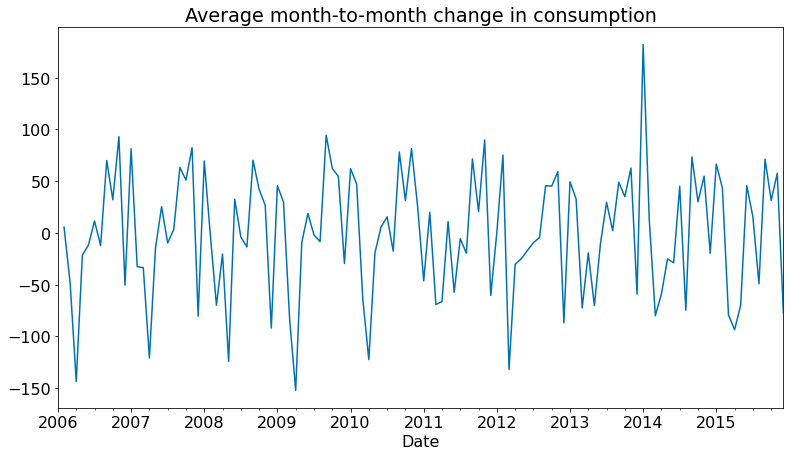

In [41]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in consumption')

Text(0, 0.5, 'Average consumption')

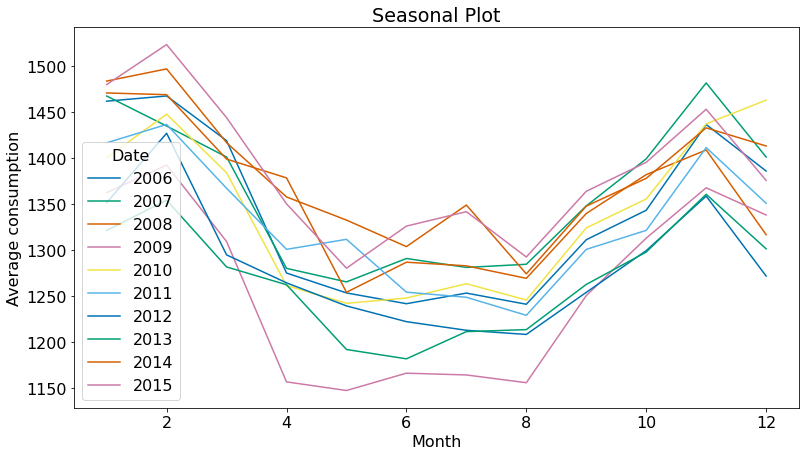

In [42]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.xlabel('Month')
plt.ylabel('Average consumption')

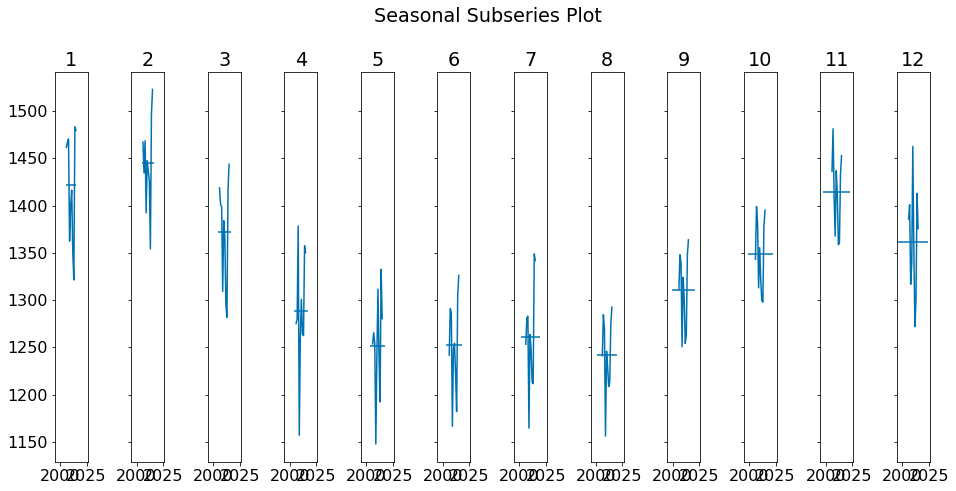

In [43]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=-2)
fig.tight_layout()

Text(0.5, 1.0, 'Mean Consumption Weekly Autocorrelation\nConsistent Seasonal Autocorrelation Observed Out to 4 Years')

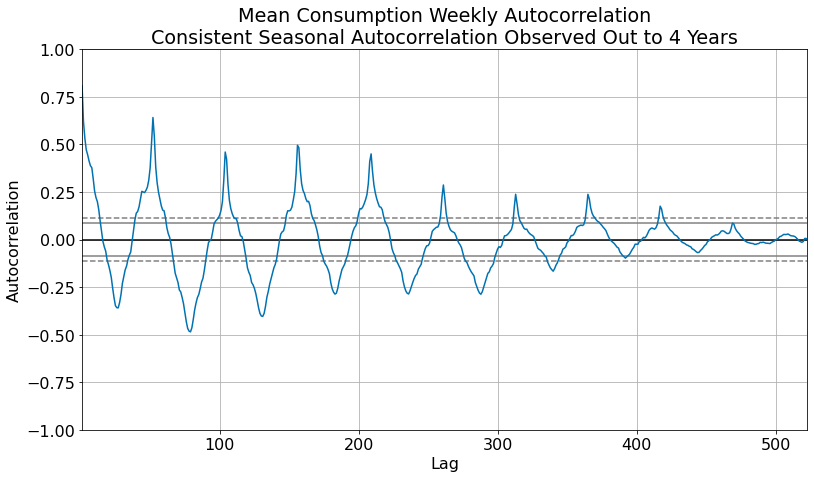

In [44]:
pd.plotting.autocorrelation_plot(train.consumption.resample('W').mean())
plt.title('Mean Consumption Weekly Autocorrelation\nConsistent Seasonal Autocorrelation Observed Out to 4 Years')

Text(0.5, 1.0, '1 Week Lag Plot - Linear Correlation Observed')

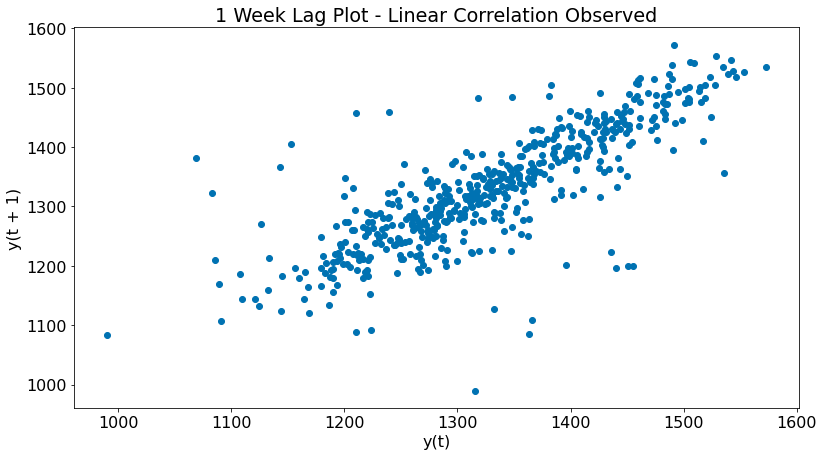

In [45]:
pd.plotting.lag_plot(train.consumption.resample('W').mean(), lag=1)
plt.title('1 Week Lag Plot - Linear Correlation Observed')

Text(0.5, 1.0, '1 Day Lag Plot of Consumption - Multiple Linear Correlations Observed')

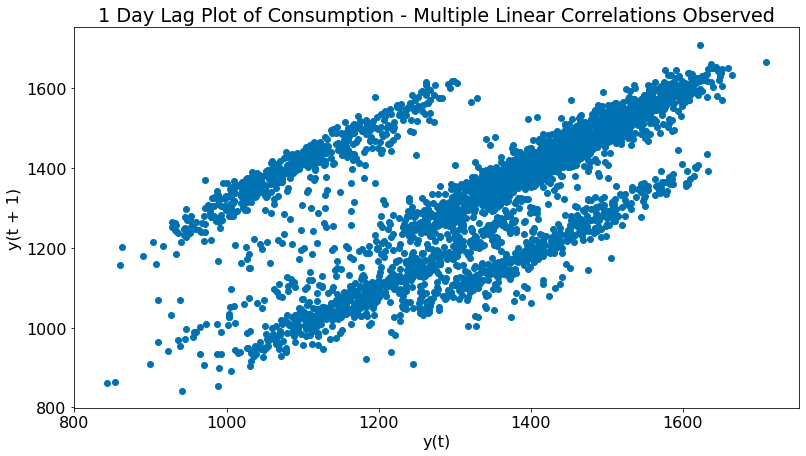

In [46]:
pd.plotting.lag_plot(train.consumption.resample('D').mean(), lag=1)
plt.title('1 Day Lag Plot of Consumption - Multiple Linear Correlations Observed')

<AxesSubplot:xlabel='Date'>

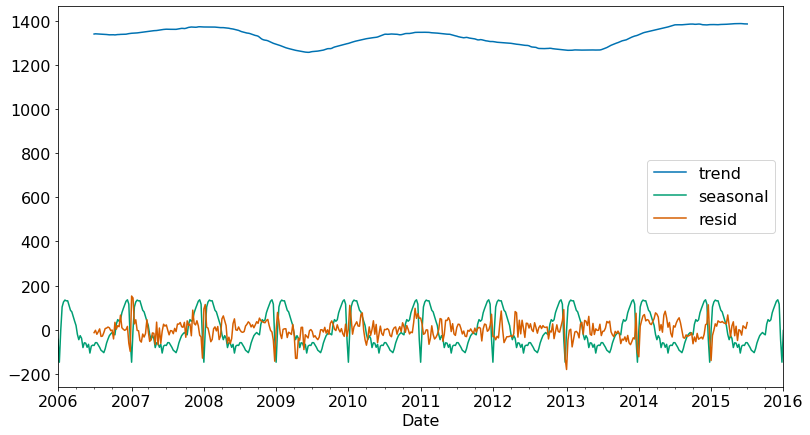

In [48]:
y = train.consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.iloc[:, 1:].plot()

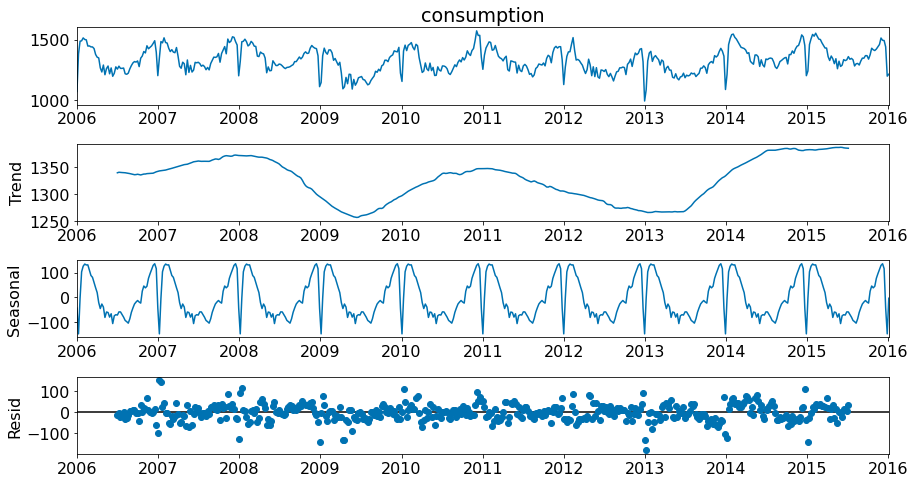

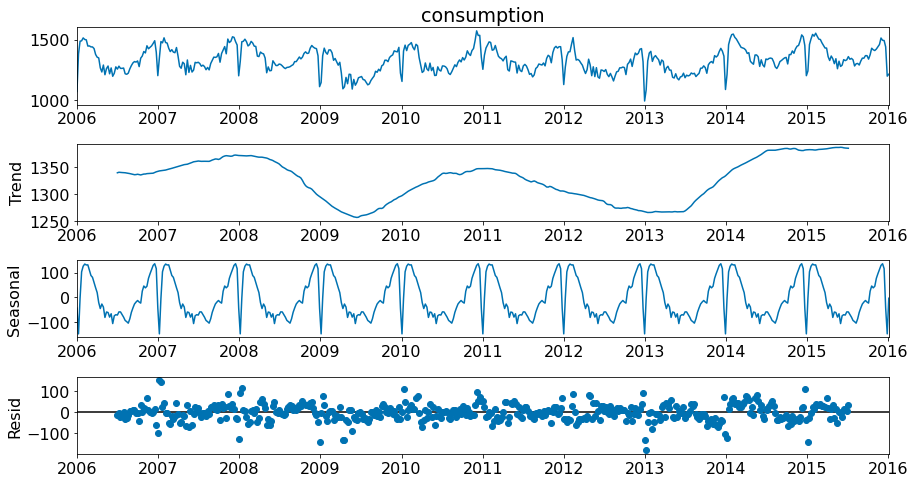

In [49]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()

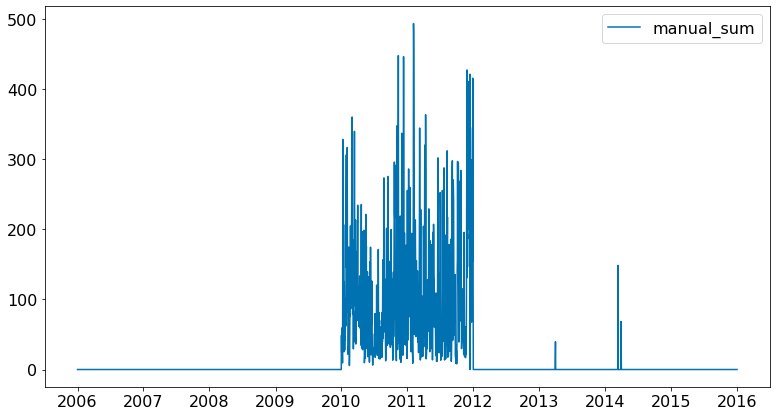

In [50]:
# plt.plot(train.wind_solar, label='wind_solar')
plt.plot((train.wind+train.solar)-train.wind_solar, label='manual_sum')
plt.legend()